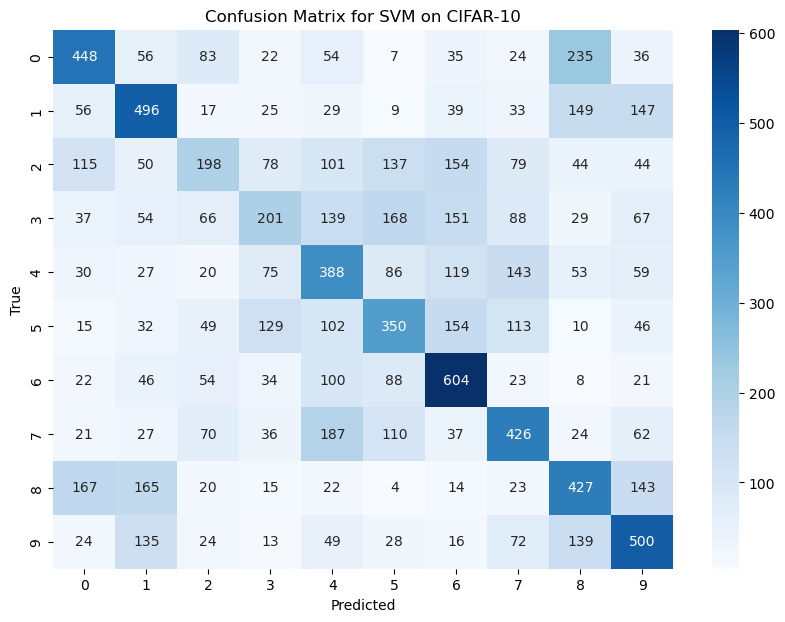

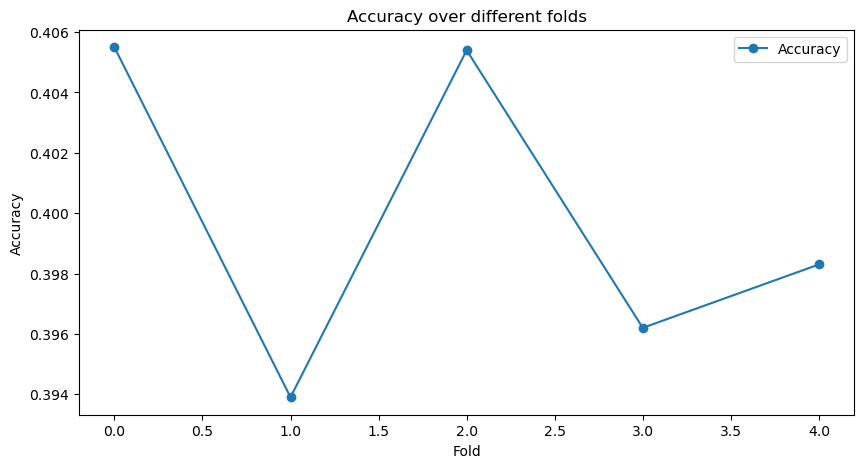

In [5]:
from skimage.feature import hog
from skimage import color, exposure
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()

# 定义HOG特征提取函数
def extract_features(images):
    features = []
    for img in images:
        img = color.rgb2gray(img)  # 转换为灰度图
        fd = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), block_norm='L2')
        features.append(fd)
    return features

# 特征提取
x_train = extract_features(x_train)
x_test = extract_features(x_test)

# 标准化特征
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# 创建SVM分类器
clf = svm.SVC(kernel='linear')

# 训练SVM
clf.fit(x_train, y_train)

# 预测
y_pred = clf.predict(x_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM on CIFAR-10')
plt.show()
# 使用交叉验证来评估模型
accuracies = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=5)
plt.figure(figsize=(10, 5))
plt.plot(accuracies, marker='o', label='Accuracy')
plt.title('Accuracy over different folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()